# **Laboratorio 8:** Introducción a Pandas
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)

¡Bienvenidos al Laboratorio 8! En este laboratorio veremos una breve introducción a Pandas, centrandonos en su estructura básica de datos: el *Dataframe*. Pandas es una librería de Python escrita como extensión de Numpy para manipulación y análisis de datos. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. En el contexto de las imágenes, Pandas nos ayudara a ubicar a todas las instancias de un conjunto de imágenes (también conocido como *Dataset*) y a realizar análisis exploratorio de datos. Esto último con el objetivo de entender la composición del *dataset* en cuestión de tamaños y anotationes. 

<img src='https://miro.medium.com/max/1400/0*Xhz01Vby2rg86xZj' width='50%'>

Registra los datos de tu equipo en esta sección al finalizar el laboratorio. 

**Nombre de equipo:**

**Miembros de equipo:**
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%) 

## 1. Introducción

Un *Dataframe* tiene una estructura muy similar a las tablas, presentes en Excel o en cualquier gestor de bases de datos relacionales. Usualmente, los *Dataframes* hacen referencia a objetos o entidades que pueden llegar a tener varias registros, los cuales serán registrados en formato de fila. Además, cada *Dataframe* puede contener varias columnas, las cuales son variables/atributos de lo que queramos registrar por cada objeto u elemento. En Pandas, cualquier dato se puede recuperar mediante su ubicación en la intersección de fila y columna. 

<img src='https://drive.google.com/uc?id=10xKQ7d-jsmCiR3TN_cEjcA19Us_-qxAA' width='80%'>

Imagen extraida desde: https://aprendeconalf.es/docencia/python/manual/pandas/

## 2. Importar librerías y creación de un dataframe 

Existen varias maneras para crear un dataframe, entre ellas estan: 

- A partir de un diccionario de listas
- A partir de una lista de listas
- A partir de una lista de diccionarios
- A partir de un array de Numpy
- A partir de un fichero CSV o Excel

En esta sección, nos concentraremos en crear un dataframe desde un fichero CSV, y luego en la sección 6, desde un diccionario de Series. Para empezar, un archivos CSV contiene datos tabulares, separados por comas. Sin embargo, también existe la posibilidad de separar los datos con tabulaciones. Usualmente, los datasets de imágenes existentes en Internet tienen sus anotaciones (categorías para las imágenes, ubicación de objetos, o anotaciones para segmentación) en el formato CSV. 



In [ ]:
import numpy as np

# Importar la librería Pandas
import pandas as pd

# Librerias utiles para trabajar con archivos
import os
import shutil

# TQDM es útil para calcular el progreso de una operación
from tqdm.auto import tqdm

# Librería para trabajar con procedimientos matematicos
import math
import random

# Para la siguiente instrucción, haremos uso de varios parametros para abrir un conjunto de datos
# guardado en formato CSV, sin embargo, es posible obviar varios.
#
# usecols = lista con nombre de columnas
# index_col = columna con el identificador de cada registro
# sep = separador con el que fue registrado el archivo CSV, algunas opciones son: ';',',','_','\t'
col_list = ["ID", "Nombre","2016","2017","Crecimiento","Unidades","fecha","Activo"]
df = pd.read_csv('ejemplo_data.csv', index_col='ID', usecols=col_list, sep=',')

In [ ]:
# Mostrar las primeras 5 filas del dataframe, si se quiere ver las últimas cinco
# podemos usar df.tail(5)
df.head(5)

,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


Las siguientes instrucciones nos permite mostrar algunos atributos del dataframe.

In [ ]:
print("Dimensiones en filas y columnas: ", df.shape)
print("Número de elementos: ", df.size)
print("Columnas del dataframe: ", df.columns)
print("Tipos de dato por columna: ", df.dtypes)

Dimensiones en filas y columnas:  (5, 7)
Número de elementos:  35
Columnas del dataframe:  Index(['Nombre', '2016', '2017', 'Crecimiento', 'Unidades', 'fecha', 'Activo'], dtype='object')
Tipos de dato por columna:  Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo          int64
dtype: object


In [ ]:
# Mostrar un resumen de la información del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 10002 to 651029
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       5 non-null      object
 1   2016         5 non-null      object
 2   2017         5 non-null      object
 3   Crecimiento  5 non-null      object
 4   Unidades     5 non-null      object
 5   fecha        5 non-null      object
 6   Activo       5 non-null      int64 
dtypes: int64(1), object(6)
memory usage: 320.0+ bytes
None


## 3. Acceso y modificación de valores en un dataframe

Una de las formas mas rápidas para acceder a algún dato es usando la funciones `iloc` y `loc`. Ambas esta integradas en cualquier dataframe. La distinción principal entre `loc` e `iloc` es que `loc` se basa en los nombres de columna e índice de filas, lo que significa que se debe especificar filas y columnas en función de sus etiquetas de fila y nombre de columna. Por otra parte, iloc se basa en posiciones de índice, como hacemos en el caso de las matrices y listas. 

In [ ]:
# Mostrar el valor ubicado en la primera fila y tercera columna, sin considerar a la columna de indice 'ID'
print(df.iloc[1, 3])

10.00%


In [ ]:
# Mostrar el valor de la fila con indice 552278 y de la columna '2016'
print(df.loc[552278, '2016'])

$920,000.00


In [ ]:
# Modificación de un dato en el dataframe 
df.loc[552278, '2016'] = "$123,456.00"

In [ ]:
df

,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
552278,Manantial sa,"$123,456.00","$101,2000.00",10.00%,700,6-23-2014,0
23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


Eliminación de filas de un dataframe

In [ ]:
# Realizar una copia del dataframe
df_copy = df.copy()

print(df_copy.shape)
# Borrar las filas 3 y 2 
df_copy = df_copy.drop(df_copy.index[[3,2]])
print(df_copy.shape)
df_copy

(5, 7)
(3, 7)


,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
552278,Manantial sa,"$123,456.00","$101,2000.00",10.00%,700,6-23-2014,0
651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


## 4. Tipos de datos con Pandas

Los tipos de dato mas usuales con los que se definen las columnas son: *object*, *int64*, *float64*, *bool*, *datetime64*, *timedelta*, y *category*. A continuación se aplican los mas utilizados. 

Los tipos de datos numéricos incluyen a enteros (**int64**) y a números de punto flotante (**float64**). Si tenemos una columna que contiene tanto enteros como números de punto flotante, Pandas asignará el tipo de dato float a toda la columna, de tal modo que los puntos decimales no se pierdan. 

Además, a diferencia de Python, el tipo de datos de texto en Pandas es conocido como objeto (**object**). 

El tipo de datos boleano (**bool**) contendra valores que pueden ser True o False. En algunas ocasiones, sera necesario convertir valores enteros 1s y 0s a su equivalencia booleana para procesar estos datos.

El tipo de datos categoría (**category**) puede guardar un número determinado de textos que serviran como clases o categorias para una columna. 

Para finalizar, Pandas cuenta con el tipo de dato fecha y hora (**datetime64**), el cual guardara valores destinados a contener datos de tiempo. 

In [ ]:
# Mostrar los tipos
df.dtypes

Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo          int64
dtype: object

## 5. Transformación de tipos de datos

En la anterior celda se puede ver que Pandas considera a la mayoría de columnas como texto, por lo cual sera necesario cambiar el tipo de datos donde se requiera. 

In [ ]:
# Cambiar tipo de dato int64 a bool
df["Activo"] = df['Activo'].astype('bool')

In [ ]:
df.dtypes

Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo           bool
dtype: object

In [ ]:
# Convertir tipo de dato object en category
df['Nombre']= df['Nombre'].astype('category')

In [ ]:
df.dtypes

Nombre         category
2016             object
2017             object
Crecimiento      object
Unidades         object
fecha            object
Activo             bool
dtype: object

In [ ]:
# La conversión de valores enteros y flotantes debe realizarse con cuidado, tomando 
# en cuenta la notación con la que esten registrados. 
# Por ejemplo, en la anterior sección pudimos ver que la columna 2016 cuenta con valores iguales a 
# '$125,000.00'. Aplicar el cambio: df['2016'].astype('float') generaría un error. 
# En estos casos, es mejor usar una función adicional para realizar la transformación de tipo de variable. 

def convertir_monto(val):
  ''' Esta función convierte un valor con comas, puntos, y signos de dolar a un valor
   númerico flotante. '''
  nuevo_data = val.replace(',','').replace('$', '')
  return float(nuevo_data)
  
def convertir_percentaje(val):
  ''' Esta función convierte un valor con signos de porcentaje a un valor
   númerico flotante. '''
  nuevo_data = val.replace('%', '')
  return float(nuevo_data) / 100

# Aplicar la función convertir_monto y convertir_percentaje a las columnas 2016, 2017, y Crecimiento 
df['2016'] = df['2016'].apply(convertir_monto)
df['2017'] = df['2017'].apply(convertir_monto)
df['Crecimiento'] = df['Crecimiento'].apply(convertir_percentaje)

df.dtypes

Nombre         category
2016            float64
2017            float64
Crecimiento     float64
Unidades         object
fecha            object
Activo             bool
dtype: object

En este punto, aún nos queda por convertir la columna Unidades en valores numéricos y la columna fecha en tipo de variable datetime64. Sin embargo, la columna Unidades tiene un valor no numérico, el cual podemos evidenciar aplicando la función `to_numeric()` de Pandas.

In [ ]:
# Convertir columna a valores numéricos
# Parametros: la columna a convertir, y el comportamiento ante posibles errores.
# Los posibles comportamientos son: raise, o mostrar un error; coerce, o definir 
# como NaN los valores que no se puedan convertir a numéricos; y ignore, o no hacer nada. 
pd.to_numeric(df['Unidades'], errors='coerce')

ID
10002     500.0
552278    700.0
23477     125.0
24900      75.0
651029      NaN
Name: Unidades, dtype: float64

Dado que tenemos un valor NaN en la columna, podemos usar la función `fillna(0)` para reemplazar los valores con NaN como 0s. Este tipo de completación se denomina inputación y forma parte de un conjunto de tecnicas para llenar datos faltantes en una tabla. 

In [ ]:
df["Unidades"]  = pd.to_numeric(df['Unidades'], errors='coerce').fillna(0)

In [ ]:
df.dtypes

Nombre         category
2016            float64
2017            float64
Crecimiento     float64
Unidades        float64
fecha            object
Activo             bool
dtype: object

In [ ]:
df

,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
10002,Verde Mar,125000.0,162500.0,0.30,500.0,1-10-2015,True
552278,Manantial sa,920000.0,1012000.0,0.10,700.0,6-23-2014,False
23477,ACME,50000.0,62500.0,0.25,125.0,3-12-2016,True
24900,Andes sur,350000.0,490000.0,0.04,75.0,10-28-2015,True
651029,San Pablo,15000.0,12750.0,-0.15,0.0,2-15-2014,False


In [ ]:
# Convertir una columna de tipo object a datetime64
df['fecha']= pd.to_datetime(df['fecha'])

In [ ]:
df.dtypes

Nombre               category
2016                  float64
2017                  float64
Crecimiento           float64
Unidades              float64
fecha          datetime64[ns]
Activo                   bool
dtype: object

## 6. Analisis Básico de Datos

Además de los dataframes, Pandas también provee de las estructuras denominadas *Series*. Estas tienen la finalidad de guardar datos en formato de lista o vector, por lo que usualmente tendrán una sola dimensión. Por otra parte, pueden guardar datos solamente de un tipo y su tamaño es inmutable, lo que significa que no se pueden extender o reducir después de su definición, pero si se puede cambiar el contenido de una Serie. En esta ocasión las usaremos para crear un pequeño dataset desde código. 

In [ ]:
# Definir un diccionario con datos en embebidos en 3 Series
d = {
    'Nombre':pd.Series(['Juan','Pedro','Ricardo','Viviana','Rosa','Soledad','Francisca',
   'Leandro','David','Mauricio','Esteban','Andrea']),
   'Edad':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Nota':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
     }

# Convertir el diccionario en un nuevo dataframe
df = pd.DataFrame(d)

In [ ]:
df

,Nombre,Edad,Nota
0,Juan,25,4.23
1,Pedro,26,3.24
2,Ricardo,25,3.98
3,Viviana,23,2.56
4,Rosa,30,3.20
5,Soledad,29,4.60
6,Francisca,23,3.80
7,Leandro,34,3.78
8,David,40,2.98
9,Mauricio,30,4.80


In [ ]:
# Obtener el valor promedio de una columna y reducir su número de decimales a 2 con Numpy
print('Edad promedio: ', np.round(df['Edad'].mean(),2))

Edad promedio:  31.83


In [ ]:
# Obtener el promedio ponderado de las edades
df['pesos'] = pd.Series([1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,5/20,5/20])

pond_formula = (df['Edad']*df['pesos']).sum()/df['pesos'].sum()
promedio_ponderado = np.average(df['Edad'], weights=df['pesos'])
print('Promedio ponderado: ', promedio_ponderado)

Promedio ponderado:  38.5


In [ ]:
# Obtener la moda de la columna edad
df.Edad.mode()

0    23
1    25
2    30
dtype: int64

In [ ]:
# Obtener la mediana de la columna edad
df.Nota.median()

3.79

In [ ]:
# Obtener los rangos de las columnas edad y nota
print('Rango nota: ', np.round(df.Nota.max()-df.Nota.min(),2))
print('Rango edad: ', np.round(df.Edad.max()-df.Edad.min(),2))

Rango nota:  2.24
Rango edad:  28


In [ ]:
# Obtener la desviación estándar de la nota y la edad
print('desviación estándar nota: ', np.round(df.Nota.std(),2))
print('desviación estándar edad: ', np.round(df.Edad.std(),2))

desviación estándar nota:  0.66
desviación estándar edad:  9.23


In [ ]:
# Obtener la varianza de la nota y la edad
print('Varianza nota: ', np.round(df.Nota.var(),2))
print('Varianza edad: ', np.round(df.Edad.var(),2))

Varianza nota:  0.44
Varianza edad:  85.24


In [ ]:
# Obtener los quantiles inferior, medio y superior de la edad y la nota
df[['Edad', 'Nota']].quantile([0.25,0.5,0.75])

,Edad,Nota
0.25,25.0,3.2300
0.50,29.5,3.7900
0.75,35.5,4.1325


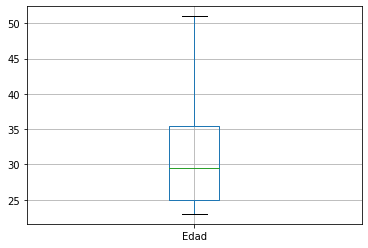

In [ ]:
# Crear el gráfico de caja para la columna edad
import matplotlib.pyplot as plt
plot = df[['Edad', 'Nombre']]
plot.boxplot()
plt.show()

In [ ]:
# Obtener la covarianza del dataframe
df.cov()

,Edad,Nota,pesos
Edad,85.242424,0.357879,0.606061
Nota,0.357879,0.437752,0.004788
pesos,0.606061,0.004788,0.006061


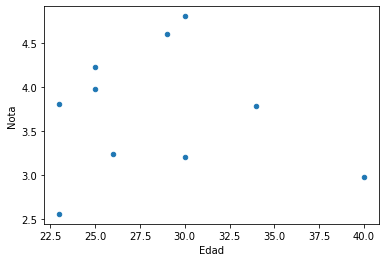

In [ ]:
# Crear el gráfico de la edad, con respecto a la nota
df.plot.scatter(x='Edad', y='Nota')
plt.show()

## 7. Procesar un dataset de imágenes

Desde esta sección nos concentraremos en trabajar con un dataset de imágenes, en especial, desde el repositorio abierto de datasets de [Kaggle](https://www.kaggle.com/). Esta es una plataforma gratuita que pose a disposición de los usuarios una serie de problemas para solucionar con temáticas como la ciencia de datos, el análisis predicativo y lo machine learning. Además cuenta con una infinidad de datasets abiertos al publico para su procesamiento y análisis. 


### Descargar dataset desde Kaggle

El dataset con el que trabajaremos se denomina "City Problems Dataset". Este es un conjunto de datos relativamente nuevo con imágenes de problemas en entornos urbanos. El dataset contiene 23,877 imágenes a todo color (2 Gb), de las cuales solo 15,223 imágenes tienen una etiqueta registrada. El resto esta orientado para la etapa de evaluación de un modelo de inteligencia artificial.

Este conjunto de datos incluye 8 clases:

- **Clase 0:** no hay evento
- **Clase 1:** árbol caído
- **Clase 2:** fuego
- **Clase 3:** inundación
- **Clase 4:** mal camino
- **Clase 5:** atasco de tráfico
- **Clase 6:** basura
- **Clase 7:** accidente de tráfico

In [ ]:
# Definir las credentiales para acceder a Kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# Puedes crear tu propio token API y nombre de usuario en la plataforma Kaggle
# deberas cambiar los siguientes datos por los de tu cuenta
api_token = {"username":"edwinsalcedo","key":"932bff1dbcf25157274e61f7d2d3c28e"}

import json

# Crear un archivo con las credenciales para que Kaggle pueda acceder fácilmente a él.
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd /content

# Comprobar si el conjunto de datos ya se ha descargado
if not os.path.exists('./city_problems'):
  os.makedirs('city_problems')
else: 
  !rm -rf city_problems

# Descargar un dataset desde Kaggle
!kaggle datasets download -d tunhunhminh/demodata -p city_problems

# Descomprimir dataset 
!unzip -qn '/content/city_problems/demodata.zip' -d /content/city_problems > /dev/null
!rm /content/city_problems/demodata.zip

/content
100% 1.89G/1.89G [00:14<00:00, 171MB/s]
100% 1.89G/1.89G [00:14<00:00, 139MB/s]


### Ordenar el dataset 

El dataset descargado contiene dos carpetas con imágenes, una para el subconjunto train y otra para el subconjunto test. En ambas carpetas podrás encontrar imágenes con extensión .jpeg, .jpg, y .png. Por otra parte, la carpeta también tiene un archivo CSV para el subconjunto train y otro para el subconjunto test. Estos archivos contienen una etiqueta por cada imagen, por lo que podrían ser de bastante utilidad para implementar un modelo de inteligencia artificial para clasificar las imágenes en las clases respectivas: no hay evento, árbol caído, fuego, inundación, mal camino, atasco de tráfico, basura , y accidente de tráfico.

Usualmente, un dataset requiere de un orden o preprocesamiento antes de utilizarlo con un modelo de inteligencia artificial. La siguiente celda reoganiza el dataset en dos carpetas separadas, en las que crearemos una carpeta por cada una de las categorias existentes en el dataset. 



In [ ]:
# Sklearn cuenta con una herramienta para dividir un dataset
# en un subconjunto de entrenamiento y un subconjunto de evaluación
# Ambos, son importantes para el trabajo con aprendizaje automatico
from sklearn.model_selection import train_test_split

TRAINSET_PATH = "/content/train_data"
TESTSET_PATH = "/content/test_data"
categories = ["no_event","fallen_tree","fire","flooding","bad_road","traffic_jam","garbage","traffic_accident"]

dataset = pd.read_csv('/content/city_problems/train.csv')

# Dividir el conjunto de datos en subconjuntos de entrenamiento y prueba con Scikit-learn
train, test = train_test_split(dataset, test_size=0.2)

train["image_path"] = " "
test["image_path"] = " "

def sort_subset(subset, target_path):
  ''' Esta función distribuye las imágenes desde una carpeta hacia múltiples
      carpetas, esto en base a las categorías a las que pertenecen las imágenes. 
  '''
  # Comprobar si las nuevas carpetas para el dataset organizado ya fueron creadas
  if os.path.exists(target_path):
    !rm -rf "$target_path"

  !mkdir "$target_path"
  dirs = {}

  # Mover cada imagen a su carpeta respectiva
  for idx, category in enumerate(categories): 
    !mkdir "$target_path/$category"
    dirs[idx] = target_path+"/"+category

  for idx, sample in tqdm(subset.iterrows(), total=len(subset)):
    image_name = subset.at[idx,"image_id"]
    category = subset.at[idx,"label"]

    new_path = dirs[category]+"/"+image_name

    shutil.copy("/content/city_problems/train/train/"+image_name,new_path)  
    subset.at[idx,"image_path"] = new_path
  
  print("Done! ",target_path)
  return subset

train = sort_subset(train,TRAINSET_PATH)
test = sort_subset(test,TESTSET_PATH)

train = train.reset_index()
test = test.reset_index()

  0%|          | 0/12178 [00:00<?, ?it/s]

Done!  /content/train_data


  0%|          | 0/3045 [00:00<?, ?it/s]

Done!  /content/test_data


In [ ]:
# Mostrar la nueva organización de carpetas en las carpetas train_data y test_data
print(os.listdir(TRAINSET_PATH))
print(os.listdir(TESTSET_PATH))

['bad_road', 'fallen_tree', 'traffic_accident', 'no_event', 'fire', 'traffic_jam', 'flooding', 'garbage']
['bad_road', 'fallen_tree', 'traffic_accident', 'no_event', 'fire', 'traffic_jam', 'flooding', 'garbage']


### Visualizar un conjunto de imágenes 



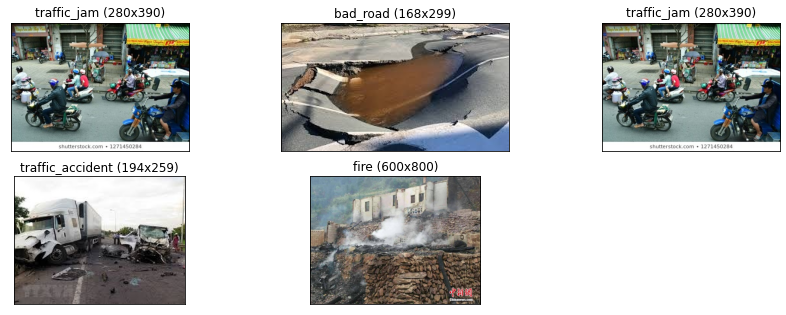

In [ ]:
import cv2

def visualize(image_array):
  plt.rcParams["figure.figsize"] = (15,8) 

  for index, sample in enumerate(image_array):
    img = cv2.imread(sample[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, index+1), plt.imshow(img)
    plt.title(sample[1]+" ("+str(img.shape[0])+"x"+str(img.shape[1])+")")
    plt.xticks([]), plt.yticks([])

random_category = random.randint(0,len(categories)-1)
images = []
num_images = 5

for num in range(num_images):
  random_image = random.randint(0,len(train)-1)
  images.append([train.at[random_image,"image_path"],categories[train.at[random_image,"label"]]])

visualize(images)

In [ ]:
print(train)

       index   image_id  label                                image_path
0       9543   9543.jpg      5      /content/train_data/garbage/9543.jpg
1       4319   4319.jpg      1  /content/train_data/fallen_tree/4319.jpg
2       3552   3552.jpg      1  /content/train_data/fallen_tree/3552.jpg
3      10609  10609.jpg      5     /content/train_data/garbage/10609.jpg
4       7683   7683.jpg      3     /content/train_data/flooding/7683.jpg
...      ...        ...    ...                                       ...
12173   4472   4472.jpg      1  /content/train_data/fallen_tree/4472.jpg
12174  11541  11541.jpg      6    /content/train_data/no_event/11541.jpg
12175  10760  10760.jpg      5     /content/train_data/garbage/10760.jpg
12176  10301  10301.jpg      5     /content/train_data/garbage/10301.jpg
12177  12189  12189.jpg      6    /content/train_data/no_event/12189.jpg

[12178 rows x 4 columns]


## **Ejercicio 1:** Análisis Exploratorio de Datos
Este ejercicio requiere que implementes tus conocimientos de procesamiento de imagenes para realizar los siguientes pasos con el dataset que acabamos de descargar:

1. Mostrar la imagen mas clara y la mas oscura en el dataset original. 
2. Aplicar CLAHE y crear una nueva versión del dataset y un nuevo dataframe con los labels y rutas. 
3. Mostrar un gráfico de barras con las dimensiones (ancho y alto) existentes en todo el dataset. En el caso de que sean muchas las variantes, puedes mostrar las 5 mas frecuentes. 
4. Crear un histograma o grafico de barras para cuantificar el numero de imagenes por categoría



## **Ejercicio 2:** Trabajando con un nuevo dataset 

Descargue un nuevo dataset publico del sitio web que prefiera desde Kaggle y resuelva los siguientes ejercicios en celdas separadas. La única regla es que el dataset debería pesar mas de 500Mb. 

0. Cree un dataframe que contenga un registro por cada imagen/archivo en el dataset. El registro tendra que estar compuesto por ruta, categoría, alto, y ancho. 
1. Realice un análisis sobre las composición de las etiquetas presentes en el dataset. 
2. Muestre un ejemplo por tipo de objeto o categoría. 
3. Genere un gráfico con la distribución de tamaños (alto y ancho de las imágenes), similar al realizado en el ejercicio anterior. 
4. Muestre cual es la categoría que mas y menos se repiten. 


## Referencias

1. Efficient Python Tricks and Tools for Data Scientists: https://khuyentran1401.github.io/Efficient_Python_tricks_and_tools_for_data_scientists/README.html 

2. Tutorial detallado sobre la libreria Pandas: https://aprendeconalf.es/docencia/python/manual/pandas/#la-clase-de-objetos-dataframe 